# Topic : Promotion of Electric vehicles in Hong Kong
## Team Harmony
### Leung Pui Shan (16)
### Lee Chung Kei (17)
### Chan Siu Keung (3)
### Chan Koon Kit (12)

##### ================================================================================================================
##### The following cells are the Python codes used in this project
##### ================================================================================================================
##### Pre-requisite libraries
##### 1) numpy
##### 2) pandas
##### 4) matplotlib
##### 5) seaborn
##### 6) plotly
##### 7) statsmodels
##### 8) sklearn
##### 9) openpyxl
##### 10) haversine
##### 11) streamlit (not able to run in VSC, run in command lime only)

#### Coding starts
##### Load HK data
##### using data from data.org.hk Monthly Traffic and Transport Digest
##### https://data.gov.hk/en-data/dataset/hk-td-tis_10-monthly-traffic-and-transport-digest

In [47]:
# If you cannot run, please cancel the ''' and run this cell
'''
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install statsmodels
%pip install sklearn
%pip install openpyxl
%pip install haversine
%pip install streamlit
'''

'\n%pip install numpy\n%pip install pandas\n%pip install matplotlib\n%pip install seaborn\n%pip install plotly\n%pip install statsmodels\n%pip install sklearn\n%pip install openpyxl\n%pip install haversine\n%pip install streamlit\n'

In [20]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# create an empty dataframe 
master_df  = pd.DataFrame() 


with open('filelistcsv.txt', 'r') as file:

    while True:
        line = file.readline()
        #print(line, end='')  # Print each line
        if line.strip() == '':
            break
        filename = line.split()[4]
        #print(filename) # get the last part as filename
        monthdate = ''.join(filename.split('_')[5:7])
        #print(monthdate)
        df = pd.read_csv(filename)
        groupeddf2= df.groupby('Fuel Type').count().reset_index()
        #sns.histplot(data=df, x='Fuel Type')
        df3 = groupeddf2[['Fuel Type','Vehicle Make']].copy()
        df3.rename(columns={'Vehicle Make': 'Count'}, inplace=True)
        df3['Date']=monthdate
        master_df=pd.concat([master_df,df3])

master_df.index = pd.to_datetime(master_df['Date'],format = '%b%Y')
master_df.sort_index
print(master_df)

           Fuel Type  Count     Date
Date                                
2020-04-01    Diesel    369  apr2020
2020-04-01  Electric    181  apr2020
2020-04-01       LPG     63  apr2020
2020-04-01    Petrol   2864  apr2020
2021-04-01    Diesel    614  apr2021
...              ...    ...      ...
2022-09-01    Petrol   2301  sep2022
2023-09-01    Diesel    353  sep2023
2023-09-01  Electric   2288  sep2023
2023-09-01       LPG    112  sep2023
2023-09-01    Petrol   1533  sep2023

[233 rows x 3 columns]


##### Plot graph for HK vehicle sale

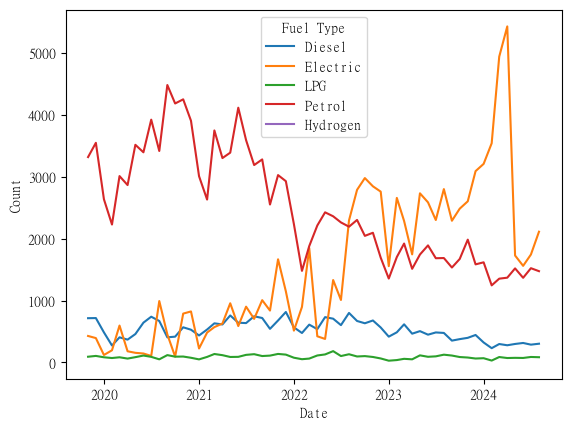

In [21]:
sns.lineplot(data=master_df, x= master_df.index, y='Count',hue = 'Fuel Type')
plt.show()

##### Plot graph for HK vehicle sale

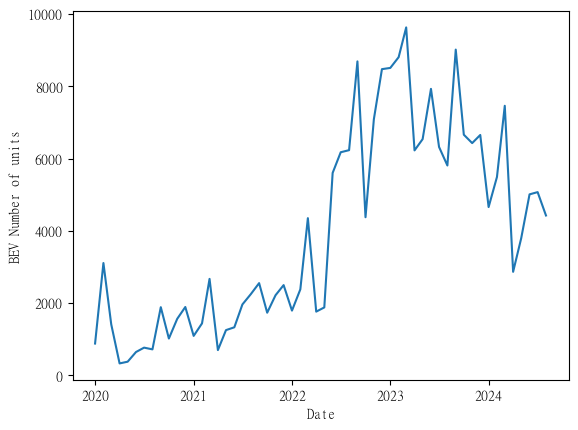

In [22]:
df_jp = pd.read_excel('EV_share_of_japan_market.xlsx')
df_jp.index = pd.to_datetime(df_jp['Date'],format = '%b%Y')
sns.lineplot(data=df_jp, x= df_jp.index, y='BEV Number of units')
plt.show()

##### Plot graph for China vehicle sale

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2022-01-01 to 2024-07-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          31 non-null     object 
 1   sales('0000)  31 non-null     float64
dtypes: float64(1), object(1)
memory usage: 744.0+ bytes


<Axes: xlabel='date'>

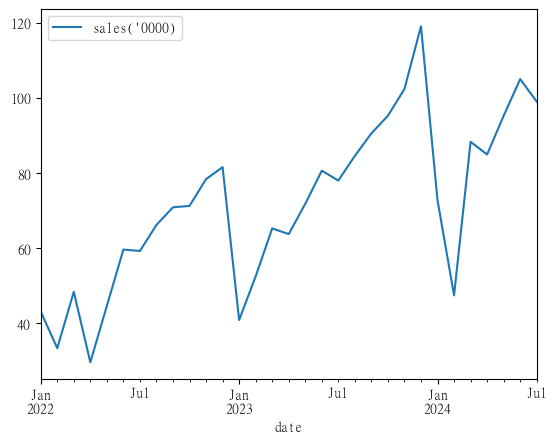

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import haversine
china_EV_sales = pd.read_csv('china_data_EV_monthly.csv')
china_EV_sales.head()
china_EV_sales.set_index('date')
china_EV_sales.index = pd.to_datetime(china_EV_sales['date'],format = '%Y-%m')
china_EV_sales.head()
china_EV_sales.info() 
china_EV_sales.plot()

##### Plot graph for Taipei vehicle sale

In [24]:
taipei_total= pd.read_csv('臺北市機動車輛登記數按使用燃料別分類.csv')
taipei_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   資料年月    13104 non-null  int64 
 1   縣市      13104 non-null  object
 2   燃料別     13104 non-null  object
 3   車種類別    13104 non-null  object
 4   數量      13104 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 512.0+ KB


In [25]:
taipei_total.head()
taipei_total.rename(columns={'資料年月':'Year','縣市':'City','燃料別':'Fuel Type','車種類別':'Car Type', '數量':'Count'}, inplace = True)
taipei_total.index = pd.to_datetime(taipei_total['Year'],format = '%Y%m')

<Axes: xlabel='Year', ylabel='Count'>

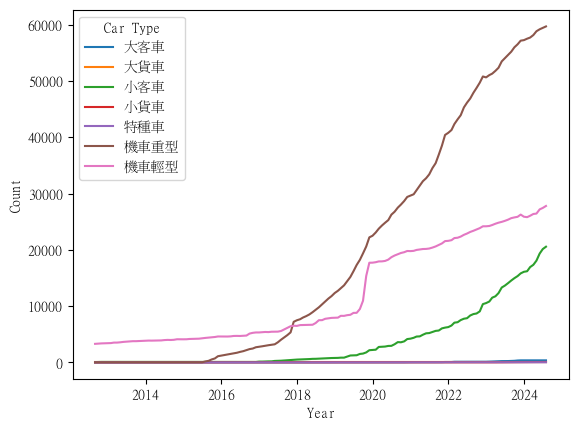

In [26]:
from matplotlib import font_manager
import matplotlib
fontP = font_manager.FontProperties(family='Microsoft JhengHei', size=14)
matplotlib.rcParams['font.family'] = 'MingLiu'
fontP.set_size(14)
taipei_electric_only = taipei_total[(taipei_total['Fuel Type'] == '電能')]
sns.lineplot(data = taipei_electric_only, x = taipei_electric_only.index, y = 'Count', hue = 'Car Type')

In [27]:
taipei_electric_only_small_car = taipei_electric_only[taipei_electric_only['Car Type']=='小客車']
taipei_electric_only_small_car=taipei_electric_only_small_car[taipei_electric_only_small_car['Year']>202001]


In [28]:
taipei_sales= pd.read_csv('臺北市新車領牌數按使用燃料別分類.csv')
taipei_sales
taipei_sales.rename(columns={'資料年月':'Year','縣市':'City','燃料別':'Fuel Type','車種類別':'Car Type', '數量':'Count'}, inplace = True)
taipei_sales

,Year,City,Fuel Type,Car Type,Count
0,201801,臺北市,汽油,大客車,0
1,201801,臺北市,汽油,大貨車,0
2,201801,臺北市,汽油,小客車,6384
3,201801,臺北市,汽油,小貨車,273
4,201801,臺北市,汽油,特種車,11
...,...,...,...,...,...
7275,202408,臺北市,總計,小客車,752131
7276,202408,臺北市,總計,小貨車,64868
7277,202408,臺北市,總計,特種車,9548
7278,202408,臺北市,總計,機車重型,880503


C:\Users\User\AppData\Local\Temp\ipykernel_11640\651983092.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taipei_sales_electric_small_car.drop(columns = ['Year','City','Fuel Type','Car Type'], inplace = True)


<Axes: xlabel='Year'>

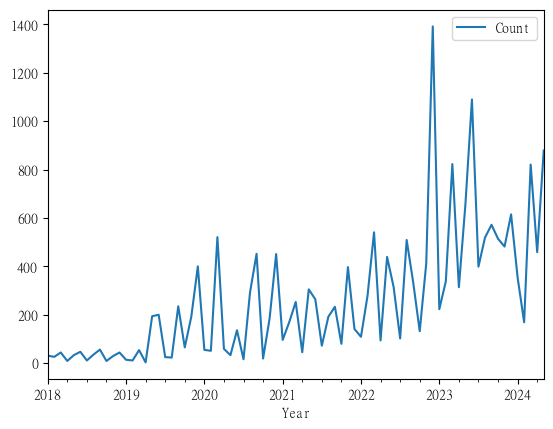

In [29]:
taipei_sales.head()
taipei_sales.index = pd.to_datetime(taipei_sales['Year'],format = '%Y%m')
taipei_sales.sample(20)
# delete the sum
taipei_sales_electric_small_car = taipei_sales[(taipei_sales['Fuel Type']=='電能') &(taipei_sales['Car Type']=='小客車')& (taipei_sales['Year']<202406)]
taipei_sales_electric_small_car.drop(columns = ['Year','City','Fuel Type','Car Type'], inplace = True)
taipei_sales_electric_small_car.plot()

In [30]:
taipei_sales_electric = taipei_sales[(taipei_sales['Fuel Type']=='電能')&(taipei_sales['Year']<202406)&(taipei_sales['Year']>201911)]
taipei_sales_electric_small = taipei_sales_electric[taipei_sales_electric['Car Type']=='小客車']
taipei_sales_electric_small.index = pd.to_datetime(taipei_sales_electric_small['Year'], format = '%Y%m')

Text(0.5, 1.0, 'Registration of vehicles in Taipei with different fuel type monthly')

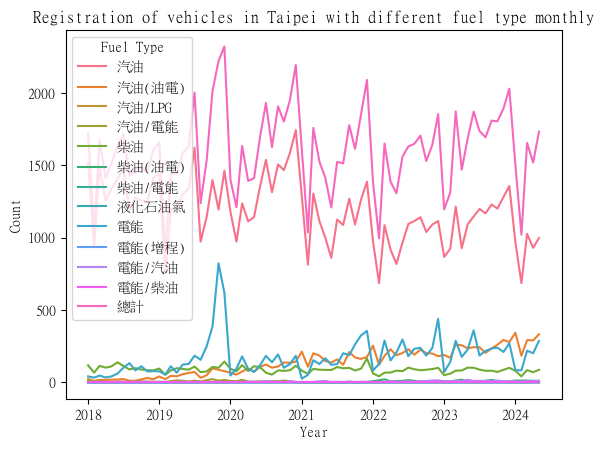

In [31]:
from matplotlib import font_manager
fontP = font_manager.FontProperties(family='Microsoft JhengHei', size=14)
taipei_sales
taipei_sales_after_2023 = taipei_sales[taipei_sales['Year']<202406]
#taipei_sales_after_2023.index = taipei_sales_after_2023['Year']
sns.lineplot(data = taipei_sales_after_2023, x=taipei_sales_after_2023.index ,y='Count', hue ='Fuel Type', errorbar = None)
plt.title('Registration of vehicles in Taipei with different fuel type monthly')

C:\Users\User\AppData\Local\Temp\ipykernel_11640\1648087709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric_plot.sort_index(inplace = True)


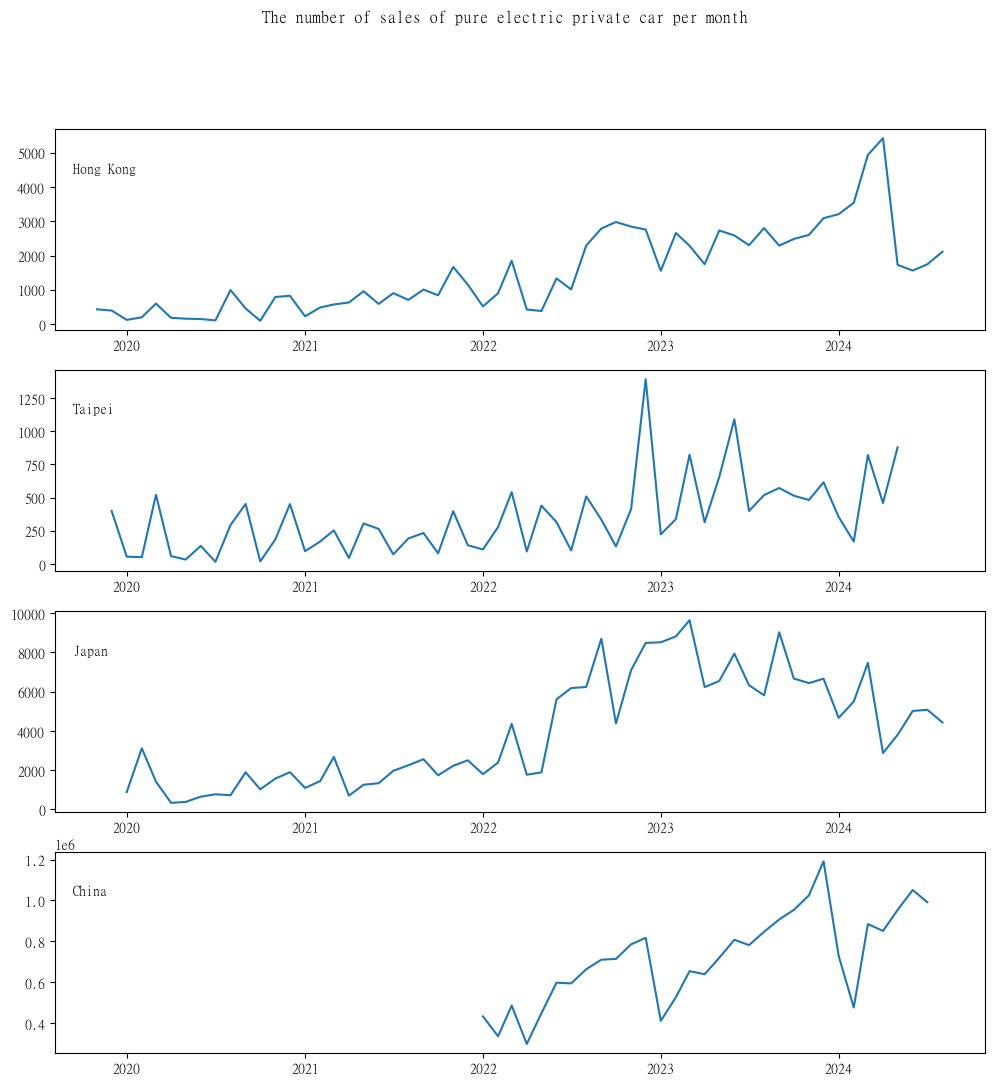

In [32]:
import matplotlib.pyplot as plt


df_electric_plot = master_df[master_df['Fuel Type']=='Electric']
df_electric_plot.sort_index(inplace = True)
plt.figure(figsize=(12,12))
ax1 = plt.subplot(411)
ax1.set_title('Hong Kong', loc='left', y=0.75, x=0.02, fontsize='medium')
plt.plot(df_electric_plot.index, df_electric_plot['Count'])
plt.suptitle('The number of sales of pure electric private car per month')
ax2= plt.subplot(412,sharex=ax1)
ax2.set_title('Taipei', loc='left', y=0.75, x=0.02, fontsize='medium')
plt.plot(taipei_sales_electric_small.index, taipei_sales_electric_small['Count'])
ax3= plt.subplot(413,sharex=ax1)
ax3.set_title('Japan', loc='left', y=0.75, x=0.02, fontsize='medium')
plt.plot(df_jp.index, df_jp['BEV Number of units'])
ax4= plt.subplot(414,sharex=ax1)
ax4.set_title('China', loc='left', y=0.75, x=0.02, fontsize='medium')
plt.plot(china_EV_sales.index, china_EV_sales["sales('0000)"]*10000)
plt.show()

##### Plot graph for HK Chargers

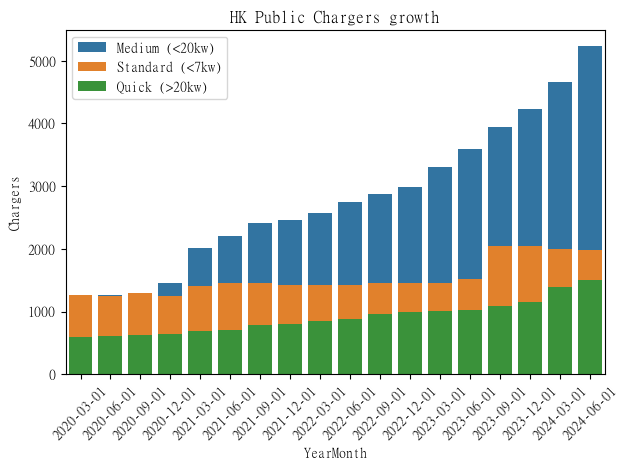

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

df = pd.read_csv('hk_ev_charger_summary.csv')

df.index = pd.to_datetime(df['YearMonth'],format = '%Y%m')
df.sort_index
#print(df)

sns.barplot(data=df, x= df.index, y=df['Medium  (≦20kW)'], label='Medium (<20kw)')
sns.barplot(data=df, x= df.index, y=df['Standard'], label='Standard (<7kw)')
sns.barplot(data=df, x= df.index, y=df['Quick (>20kW)'], label='Quick (>20kw)')


plt.xticks(rotation=45)
plt.title('HK Public Chargers growth')
plt.ylabel('Chargers' )
plt.tight_layout()
plt.show()

##### Plot graph for China Chargers

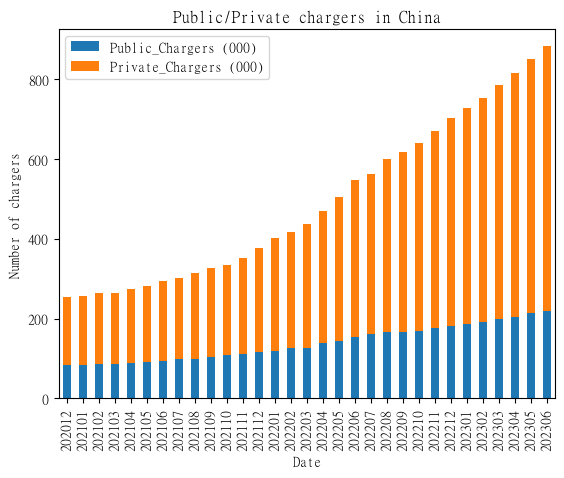

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

df = pd.read_csv('CN_Charger_All_Dataset.csv')

df.index = pd.to_datetime(df['YearMonth'],format = '%Y%m')
df.sort_index
#print(df)

# plot bars in stack manner

ax =  df.plot(x='YearMonth', kind='bar', stacked=True,
        title='Public/Private chargers in China')
ax.set_xlabel("Date")
ax.set_ylabel("Number of chargers")

plt.show()

##### Aggregate data to inception to date
##### For modelling
##### since the data is startig from 2019-11 only, an adjustment will be done later

In [35]:
#acculumate HK data
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

df_hk = pd.read_csv('mastervehicle.csv')
df_hk_cumulate = df_hk.groupby(['Date', 'Vehicle Class','Fuel Type'])['Classified'].count().reset_index()
#df_hk_cumulate.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
#print(df_hk_cumulate)
df_new = df_hk_cumulate[['Date', 'Vehicle Class','Fuel Type']].copy()
df_new = df_hk_cumulate.copy()
df_new.index = df_new['Date']
#build the date list first
date_list =  sorted(df_hk['Date'].unique())
master_dict = {}

# create an empty dataframe 
master_agg  = pd.DataFrame() 
final_agg = pd.DataFrame()
for i in date_list:
    print(i)
    #print(df_new.loc[i])
    curr_month_cumulate = df_new.loc[i].groupby(['Vehicle Class','Fuel Type','Classified']).count().reset_index()
    #print(curr_month_cumulate)
    master_agg=pd.concat([master_agg,curr_month_cumulate])
    #print(master_agg)
    curr_month = master_agg.groupby(['Vehicle Class','Fuel Type'])['Classified'].sum().reset_index()
    curr_month['Date'] = i
    print(curr_month)
    final_agg=pd.concat([final_agg,curr_month])
   
final_agg.index = final_agg['Date']
filename = f"agg.csv"
final_agg.to_csv(filename)    


C:\Users\User\AppData\Local\Temp\ipykernel_11640\3004184748.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hk = pd.read_csv('mastervehicle.csv')


2019-11-01
        Vehicle Class Fuel Type  Classified        Date
0                 HGV    Diesel          15  2019-11-01
1                 LGV    Diesel         480  2019-11-01
2                 LGV  Electric           3  2019-11-01
3                 MGV    Diesel         163  2019-11-01
4          Motorcycle    Petrol         640  2019-11-01
5         Private Bus    Diesel           2  2019-11-01
6         Private Car  Electric         424  2019-11-01
7         Private Car    Petrol        2676  2019-11-01
8   Private Light Bus    Diesel           4  2019-11-01
9   Private Light Bus  Electric           1  2019-11-01
10  Private Light Bus       LPG           3  2019-11-01
11         Public Bus    Diesel          48  2019-11-01
12   Public Light Bus    Diesel           3  2019-11-01
13   Public Light Bus       LPG          27  2019-11-01
14               Taxi       LPG          63  2019-11-01
2019-12-01
        Vehicle Class Fuel Type  Classified        Date
0                 HGV    D

##### Plot China Charger graph

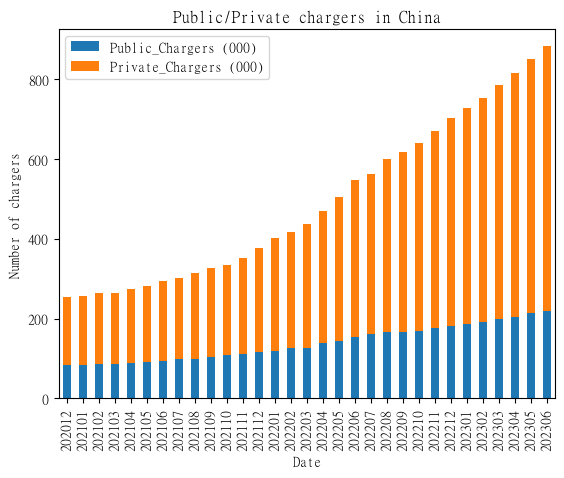

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

df = pd.read_csv('CN_Charger_All_Dataset.csv')

df.index = pd.to_datetime(df['YearMonth'],format = '%Y%m')
df.sort_index
#print(df)

# plot bars in stack manner

ax =  df.plot(x='YearMonth', kind='bar', stacked=True,
        title='Public/Private chargers in China')
ax.set_xlabel("Date")
ax.set_ylabel("Number of chargers")

plt.show()

##### Plot HK Charging rate

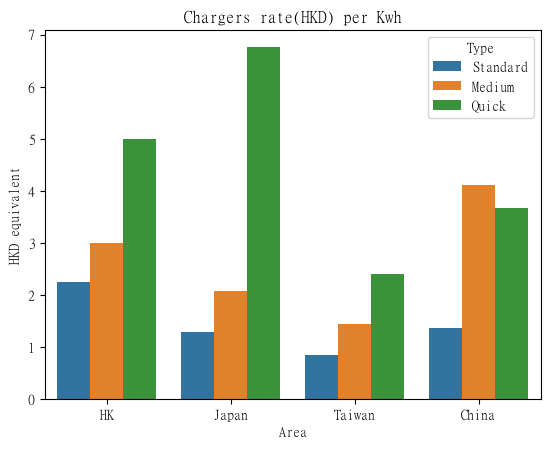

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

df = pd.read_csv('ev_rate.csv')

#df.index = pd.to_datetime(df['YearMonth'],format = '%Y%m')

#df.index = df['Country']

ax = sns.barplot(x="Country", y="HKDequivalent", data=df, hue = 'Type')
ax.set(xlabel='Area', ylabel='HKD equivalent')

plt.title('Chargers rate(HKD) per Kwh')
plt.show()


##### ARIMA Modelling

##### The following code can only be run in terminal mode and not in VSC environment
##### It is used to plot the location of the charging station in a Hong Kong map

In [38]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

def get_ev_data():
    import pandas as pd

    df2=pd.read_excel('EV_Charger.xlsx')
    #Longitude
    #Latitude
    df2 = df2.rename(columns={'LOCATION_EN': 'Name',
                            'GeometryLongitude': 'lon',
                            'GeometryLatitude': 'lat' })
    
    df2['lon']=pd.to_numeric(df2['lon'], errors='coerce')
    df2['lat']=pd.to_numeric(df2['lat'], errors='coerce')
    df2.dropna(inplace=True)
    
    return df2


latitude = 22.28552
longitude = 114.15769

st.title('HK EV charging stations location')

df2 = get_ev_data()

st.map(df2)


st.table(df2)

import plotly.express as px

fig2 = px.scatter_mapbox(df2, lat="lat", lon="lon", hover_name="Name",  size_max=15, zoom=10)
fig2.update_layout(mapbox_style="open-street-map")

st.plotly_chart(fig2)

2024-10-21 17:08:41.894 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 17:08:42.105 
  command:

    streamlit run c:\Users\User\Documents\GitHub\erbscope99\.venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-21 17:08:42.105 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 17:08:42.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 17:08:42.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 17:08:42.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 17:08:42.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 17:08:42.282 

DeltaGenerator()

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA


df_electric = master_df[master_df['Fuel Type'] == 'Electric']

columns_to_drop = ['Vehicle Class', 'Vehicle Make', 'Vehicle Model', 'Fuel Type',
                   'Cylinder Capacity Of Engine (c.c.)', 'Rated Power (kW)', 'Body Type',
                   'First Registration Vehicle Status (Note)',
                   'Permitted Gross Vehicle Weight ', 'Number Of Passenger Seats ',
                   'Taxable Value (HK$)']
print(df_electric.columns)

df_electric = pd.read_csv('master_df-1.csv')
df_electric

Index(['Fuel Type', 'Count', 'Date'], dtype='object')


,Fuel Type,Count,Date
0,Diesel,614,apr2021
1,Electric,629,apr2021
2,LPG,118,apr2021
3,Petrol,3300,apr2021
4,Diesel,538,apr2022
...,...,...,...
224,Petrol,2301,sep2022
225,Diesel,353,sep2023
226,Electric,2288,sep2023
227,LPG,112,sep2023


In [40]:
df_electric = pd.read_csv('master_df-1.csv')
df_electric=df_electric[df_electric['Fuel Type']=='Electric']
df_electric.set_index('Date', inplace=True)

df_electric.index = pd.to_datetime(df_electric.index, format='%b%Y')
df_electric.sort_index(inplace=True)
df_electric.index = df_electric.index.to_period('M')
df_electric.drop(columns='Fuel Type', inplace  = True)
df_electric

,Count
Date,
2019-11,428
2019-12,394
2020-01,121
2020-02,197
2020-03,596
2020-05,156
2020-06,145
2020-07,106
2020-08,992


##### Calculate average distance of combination of two charging station in HK

In [41]:
hk_charger = pd.read_excel('EV_Charger.xlsx')
hk_charger.head(20)


,NAME_OF_DISTRICT_COUNCIL_DISTRICT_EN,LOCATION_EN,ADDRESS_EN,NAME_OF_DISTRICT_COUNCIL_DISTRICT_TC,LOCATION_TC,ADDRESS_TC,NAME_OF_DISTRICT_COUNCIL_DISTRICT_SC,LOCATION_SC,ADDRESS_SC,STANDARD_BS1363_no,...,MEDIUM_OTHERS_no,QUICK_CHAdeMO_no,QUICK_CCS_DC_COMBO_no,QUICK_IEC62196_no,QUICK_GB_T20234_3_DC__no,QUICK_OTHERS_no,REMARK_FOR__OTHERS_,DATA_PATH,GeometryLongitude,GeometryLatitude
0,Central & Western,CENTRESTAGE,"HOLLYWOOD ROAD, CENTRAL & WESTERN",中西區,聚賢居,中西區 荷李活道,中西区,聚贤居,中西区 荷李活道,0,...,6,0,0,0,0,4,Tesla Wall Connector,https://ev-charger.epd.gov.hk/resource/ev_char...,114.150894,22.283770
1,Central & Western,WING ON CENTRE,"CONNAUGHT ROAD CENTRAL, CENTRAL & WESTERN",中西區,永安中心,中西區 干諾道中,中西区,永安中心,中西区 干诺道中,0,...,2,0,0,0,0,0,Tesla Wall Connector,https://ev-charger.epd.gov.hk/resource/ev_char...,114.153015,22.286591
2,Central & Western,MAN YEE BUILDING,"DES VOEUX ROAD CENTRAL, CENTRAL & WESTERN",中西區,萬宜大廈,中西區 德輔道中,中西区,万宜大厦,中西区 德辅道中,0,...,0,0,0,2,0,0,-,-,114.156151,22.283655
3,Central & Western,KWAN YICK BUILDING PHASE 3,"DES VOEUX ROAD WEST, CENTRAL & WESTERN",中西區,均益大廈第三期,中西區 德輔道西,中西区,均益大厦第三期,中西区 德辅道西,0,...,2,0,0,0,0,1,Tesla Wall Connector,https://ev-charger.epd.gov.hk/resource/ev_char...,114.140053,22.288149
4,Central & Western,NEW WORLD TOWER,"QUEEN'S ROAD CENTRAL, CENTRAL & WESTERN",中西區,新世界大廈,中西區 皇后大道中,中西区,新世界大厦,中西区 皇后大道中,1,...,0,0,0,0,0,0,-,-,114.156937,22.280323
5,Central & Western,THE CENTER,"QUEEN'S ROAD CENTRAL, CENTRAL & WESTERN",中西區,中環中心,中西區 皇后大道中,中西区,中环中心,中西区 皇后大道中,0,...,0,0,0,0,0,0,-,-,114.154701,22.284603
6,Central & Western,ISLAND SHANGRI-LA HOTEL,"QUEENSWAY, CENTRAL & WESTERN",中西區,港島香格里拉大酒店,中西區 金鐘道,中西区,港岛香格里拉大酒店,中西区 金钟道,0,...,0,0,0,0,0,1,Tesla Wall Connector,https://ev-charger.epd.gov.hk/resource/ev_char...,114.164307,22.277136
7,Central & Western,CITIC TOWER,"TIM MEI AVENUE, CENTRAL & WESTERN",中西區,中信大廈,中西區 添美道,中西区,中信大厦,中西区 添美道,0,...,0,0,0,0,0,3,Tesla Wall Connector,https://ev-charger.epd.gov.hk/resource/ev_char...,114.167160,22.280632
8,Central & Western,TWO IFC (International Finance Centre) - IFC II,"FINANCE STREET, CENTRAL & WESTERN",中西區,國際金融中心二期,中西區 金融街,中西区,国际金融中心二期,中西区 金融街,0,...,0,0,0,7,0,0,-,https://ev-charger.epd.gov.hk/resource/ev_char...,114.157738,22.285873
9,Central & Western,Sun Yat Sen Memorial Park,16 Eastern Street,中西區,中山紀念公園,東邊街16號,中西区,中山纪念公园停车场(游泳池),西营盘东边街北16号,0,...,0,0,0,0,0,0,-,-,114.143805,22.289588


In [42]:
import math
from itertools import combinations
from haversine import haversine, Unit


x=[]
y=[]
def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
distances = 0
for i in range(len(hk_charger.index)):
    x.append(hk_charger.loc[i,'GeometryLatitude'].item())
for i in range(len(hk_charger.index)):
    y.append(hk_charger.loc[i,'GeometryLongitude'].item())
    
points = list(zip(x,y))
distances = [haversine(p1, p2) for p1, p2 in combinations(points, 2)]
amount = 0 
for i in distances:
    amount += i
amount/len(distances)

12.885812066733697

##### Calculate average distance of combination of two charging station in Taipei

In [43]:
from haversine import haversine, Unit

distance =[haversine(p1, p2) for p1, p2 in combinations(points, 2)]
amount = 0 
for i in distance:
    amount += i
amount/len(distance)

12.885812066733697

Current data:
Count: Date
2019-11     428
2019-12     394
2020-01     121
2020-02     197
2020-03     596
2020-05     156
2020-06     145
2020-07     106
2020-08     992
2020-09     453
2020-10      95
2020-11     789
2020-12     824
2021-01     226
2021-02     483
2021-03     571
2021-04     629
2021-05     956
2021-06     588
2021-07     901
2021-08     704
2021-09    1006
2021-10     838
2021-11    1666
2021-12    1149
2022-01     514
2022-02     897
2022-03    1847
2022-04     423
2022-05     380
2022-06    1331
2022-07    1009
2022-08    2293
2022-09    2787
2022-10    2977
2022-11    2844
2022-12    2758
2023-01    1555
2023-02    2657
2023-03    2284
2023-04    1745
2023-05    2731
2023-06    2585
2023-07    2300
2023-08    2799
2023-09    2288
2023-10    2483
2023-11    2602
2023-12    3089
2024-01    3206
2024-02    3539
2024-03    4937
2024-04    5425
2024-05    1727
2024-06    1560
2024-07    1743
2024-08    2111
Freq: M, Name: Count, dtype: int64


<Figure size 1200x600 with 0 Axes>

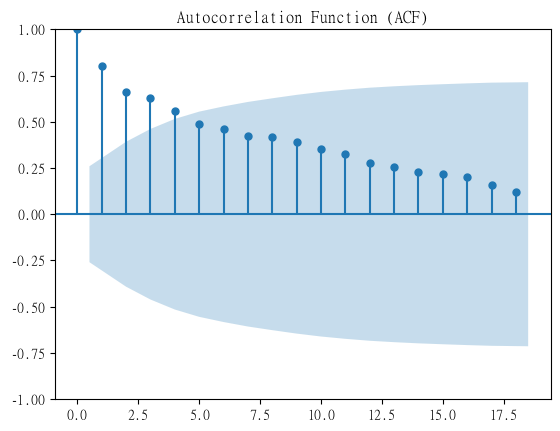

<Figure size 1200x600 with 0 Axes>

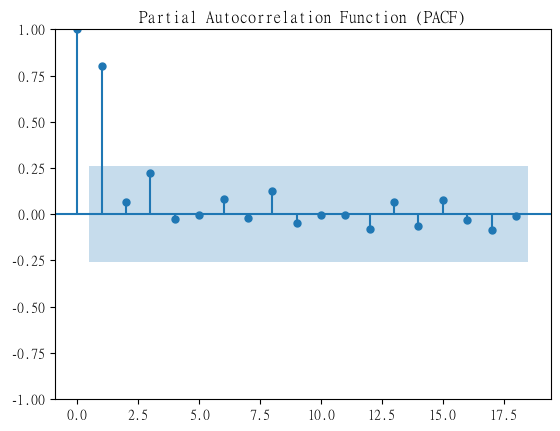

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                   57
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -444.782
Date:                Mon, 21 Oct 2024   AIC                            901.564
Time:                        17:08:44   BIC                            913.716
Sample:                    11-30-2019   HQIC                           906.276
                         - 08-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4325      0.341      1.269      0.205      -0.236       1.101
ar.L2         -0.2364      0.217     -1.091      0.275      -0.661       0.188
ar.L3          0.1142      0.249      0.458      0.6

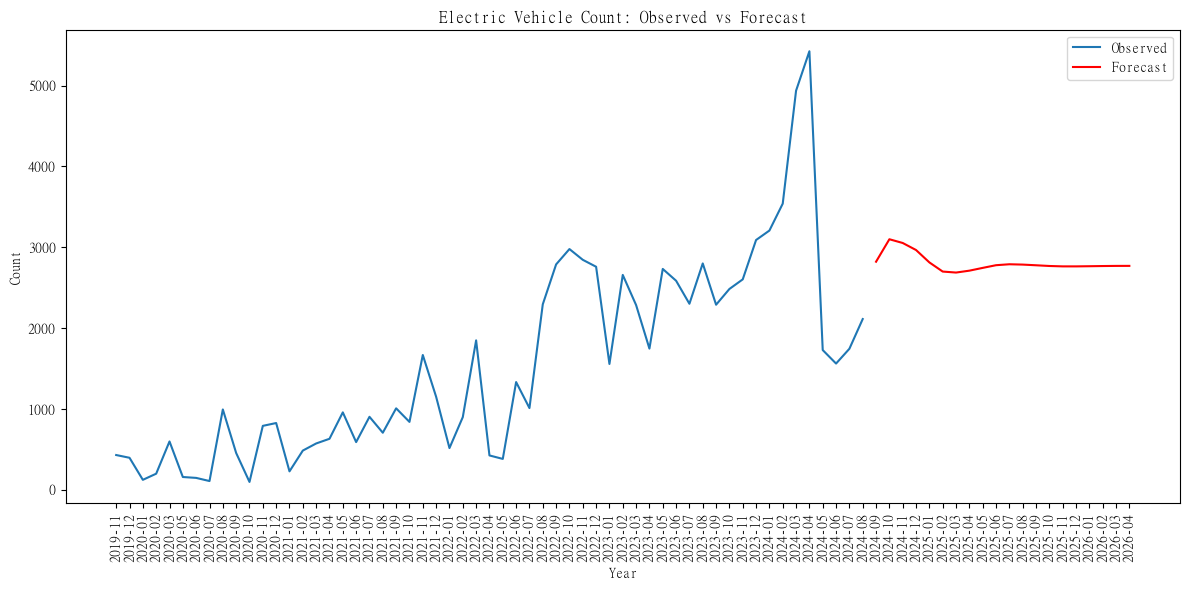


Forecast for the next 10 years:


C:\Users\User\AppData\Local\Temp\ipykernel_11640\1373068176.py:43: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [44]:
print("Current data:")
for year, count in df_electric.items():
    print(f"{year}: {count}")

plt.figure(figsize=(12, 6))
plot_acf(df_electric)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_electric, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

model = ARIMA(df_electric, order=(4,1,1))
model_fit = model.fit()


print(model_fit.summary())

forecast_steps = 20
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(df_electric.index.astype(str), df_electric.values, label='Observed')
forecast_index = pd.period_range(start=df_electric.index[-1] + 1, periods=forecast_steps, freq='M')
plt.plot(forecast_index.astype(str), forecast, color='red', label='Forecast')
plt.title('Electric Vehicle Count: Observed vs Forecast')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\nForecast for the next 10 years:")
last_observed = df_electric.iloc[-1]
for year, value in zip(forecast_index.astype(str), forecast):
    increase_percent = (value - last_observed) / last_observed * 100
    #print(f"{year}: {value:.0f} (Increase: {increase_percent:.2f}%)")
    last_observed = value

total_increase_percent = (forecast[-1] - df_electric.iloc[-1]) / df_electric.iloc[-1]

##### Calculate and plot the vehicle and charging guns ratio

In [45]:
import math
from itertools import combinations
from haversine import haversine, Unit

hk_lpg = pd.read_csv('lpg_filling_station.csv')
x=[]
y=[]
def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
distances = 0
for i in range(len(hk_lpg.index)):
    x.append(hk_lpg.loc[i,'Latitude'].item())
for i in range(len(hk_lpg.index)):
    y.append(hk_lpg.loc[i,'Longitude'].item())
    
points = list(zip(x,y))
distances = [haversine(p1, p2) for p1, p2 in combinations(points, 2)]
amount = 0 
for i in distances:
    amount += i
amount/len(distances)

15.063210084773763

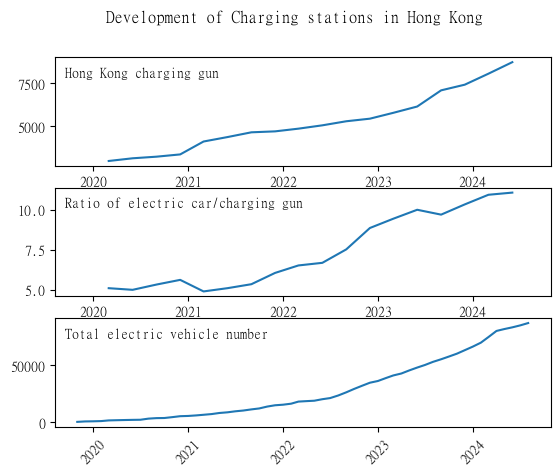

In [46]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

df = pd.read_csv('hk_ev_charger_summary.csv')
df_hk = pd.read_csv('agg.csv')
df_hk_electric = df_hk[(df_hk['Fuel Type']=='Electric') & (df_hk['Vehicle Class']=='Private Car')]
df.index = pd.to_datetime(df['YearMonth'],format = '%Y%m')
df.sort_index
df_hk_electric.index = pd.to_datetime(df_hk_electric['Date'], format = '%Y-%m-%d')
course2=df.merge(df_hk_electric, how='left', left_on=  df.index, right_on= df_hk_electric.index)
course2.to_csv('course2.csv')
course2['ratio']=(course2['Classified']+13403)/course2['Total']
course2.index = pd.to_datetime(course2['YearMonth'],format = '%Y%m')
ax1 = plt.subplot(311)
ax1.plot( df.index, df.Total)
ax1.set_title('Hong Kong charging gun', loc='left', y=0.75, x=0.02, fontsize='medium')
ax2 = plt.subplot(312, sharex = ax1)
ax2.plot(course2.index,course2['ratio'])
ax2.set_title('Ratio of electric car/charging gun', loc='left', y=0.75, x=0.02, fontsize='medium')
ax3 = plt.subplot(313, sharex = ax1)
ax3.plot(df_hk_electric.index, df_hk_electric['Classified'])
ax3.set_title('Total electric vehicle number', loc='left', y=0.75, x=0.02, fontsize='medium')
plt.suptitle('Development of Charging stations in Hong Kong')
plt.xticks(rotation=45)
plt.show()
#df.head()